In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LassoCV,Ridge,RidgeCV,Lasso
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
bostondf = pd.DataFrame(boston.data,columns=boston.feature_names)
Y=boston.target

In [3]:
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(bostondf.shape)
bostondf.describe()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [13]:
bostondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
# There are total 506 records 

In [7]:
bostondf['MEDV']=Y

In [8]:
bostondf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
## There are no missing records 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228BB62C808>,
      dtype=object)

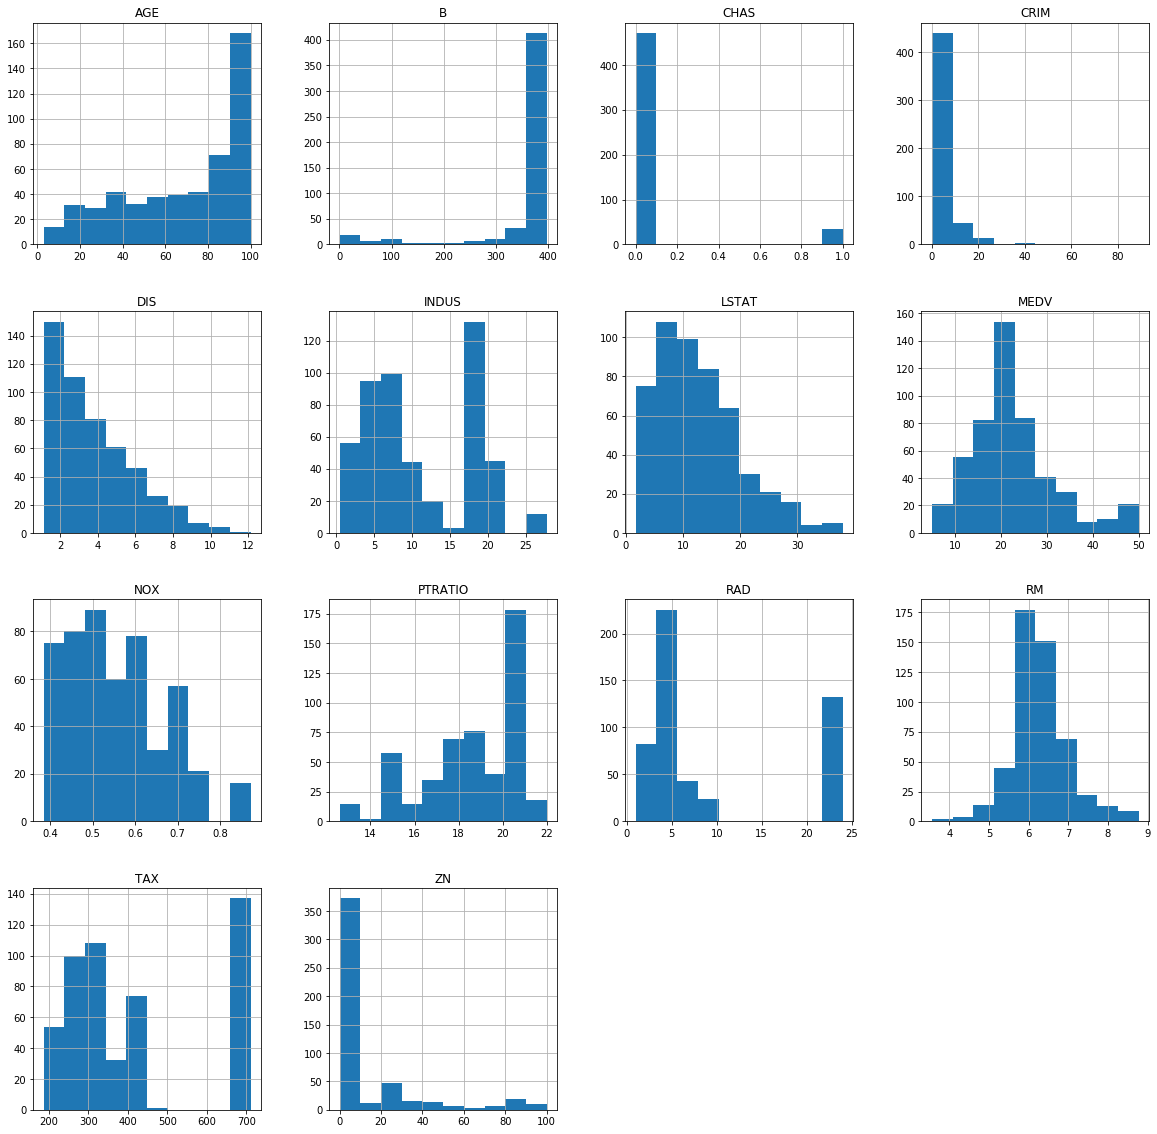

In [10]:
#plt.figure(figsize=(15,8))
bostondf.hist(figsize=(20,20))

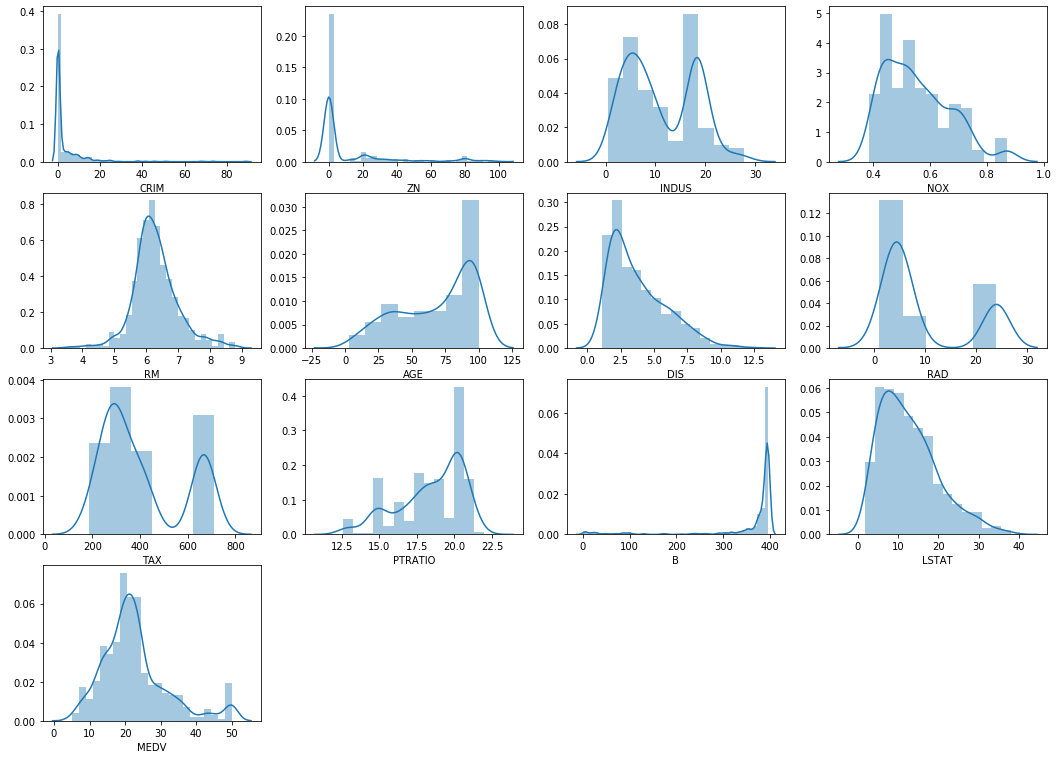

In [20]:
cols.remove('CHAS')
#cols=[col for col in bostondf.select_dtypes(exclude=['object']).copy()]
index=0
plt.figure(figsize=(18,20))
for col in cols:
    plt.subplot(6,4,index+1)
    index+=1
    sns.distplot(bostondf[col])  

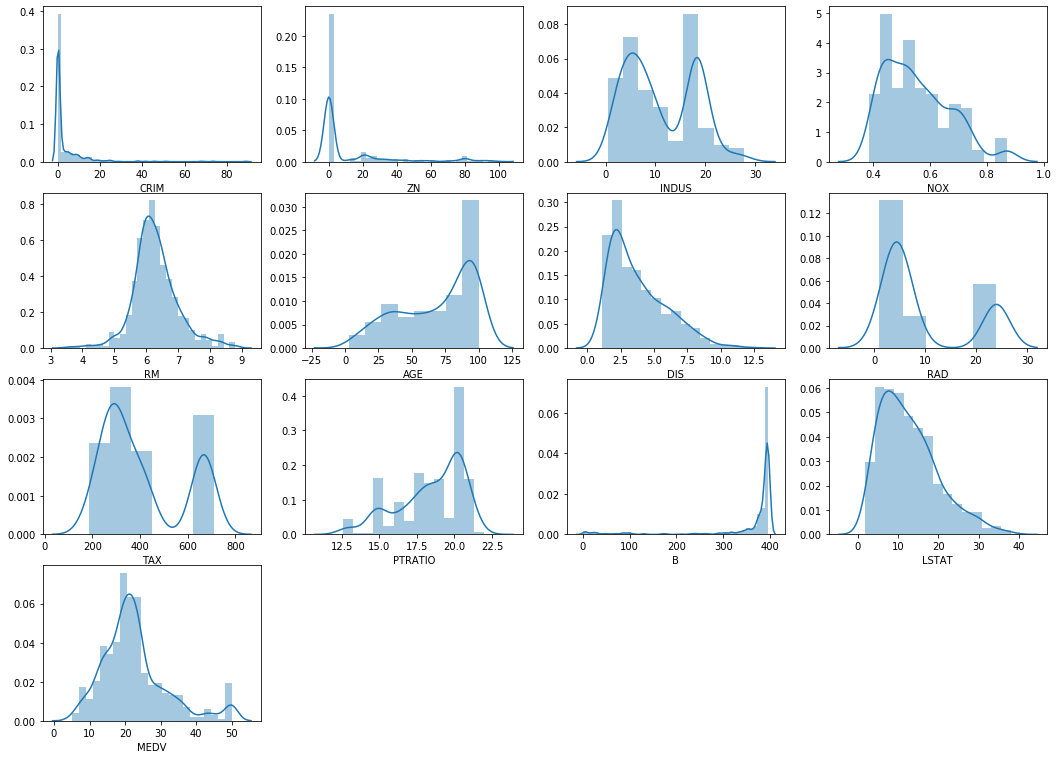

In [21]:
index=0
cols=[col for col in bostondf.select_dtypes(exclude=['object']).copy()]
cols.remove('CHAS')
fig = plt.figure(figsize=(18,20))
#fig = plt.figure(figsize=(18,16))
for col in cols:
    plt.subplot(6,4,index+1)
    index+=1
    sns.distplot(bostondf[col])  


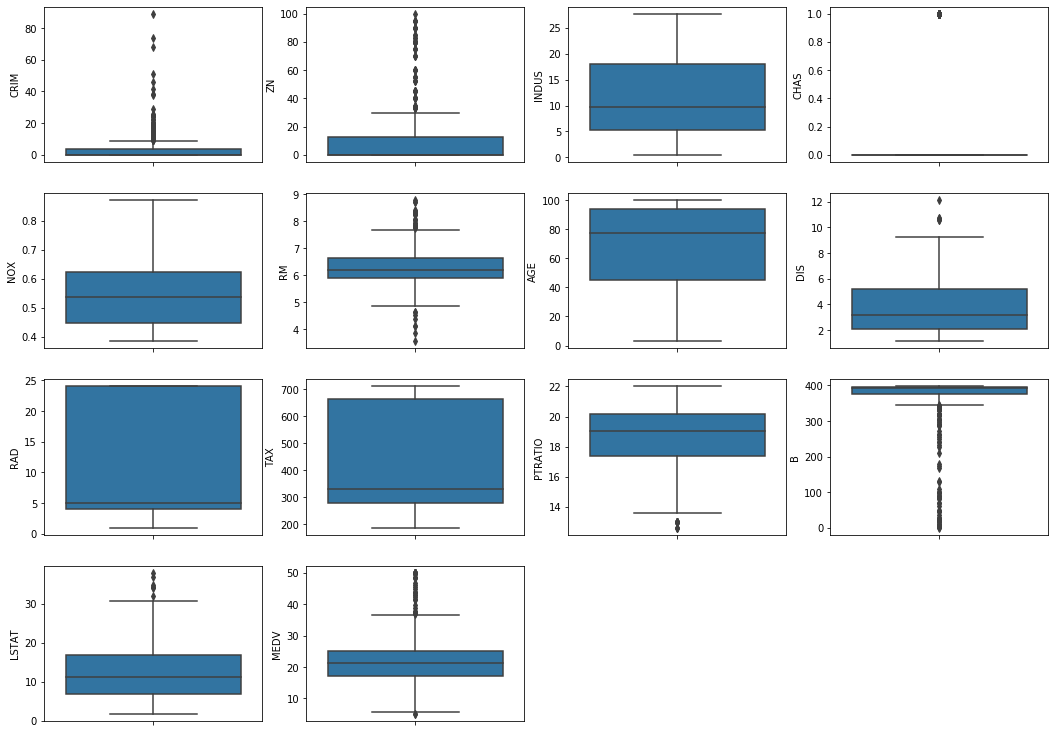

In [22]:
index=0
cols=[col for col in bostondf.select_dtypes(exclude=['object']).copy()]
fig = plt.figure(figsize=(18,20))
#fig = plt.figure(figsize=(18,16))
for col in cols:
    plt.subplot(6,4,index+1)
    index+=1
    sns.boxplot(y=col,data=bostondf)  


In [23]:
## There are outliers in various records,2 percentile of the data can be removed. 

In [24]:
bostondf[bostondf['B']>300]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


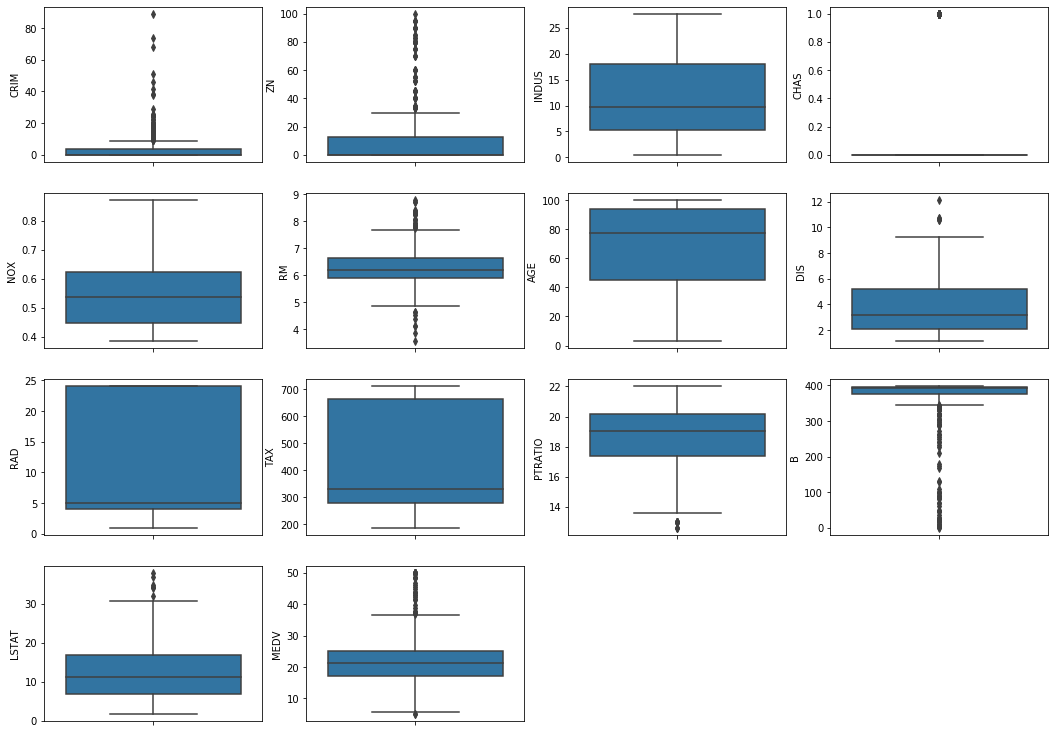

In [25]:
index=0
cols=[col for col in bostondf.select_dtypes(exclude=['object']).copy()]
fig = plt.figure(figsize=(18,20))
#fig = plt.figure(figsize=(18,16))
for col in cols:
    plt.subplot(6,4,index+1)
    index+=1
    sns.boxplot(y=col,data=bostondf)  

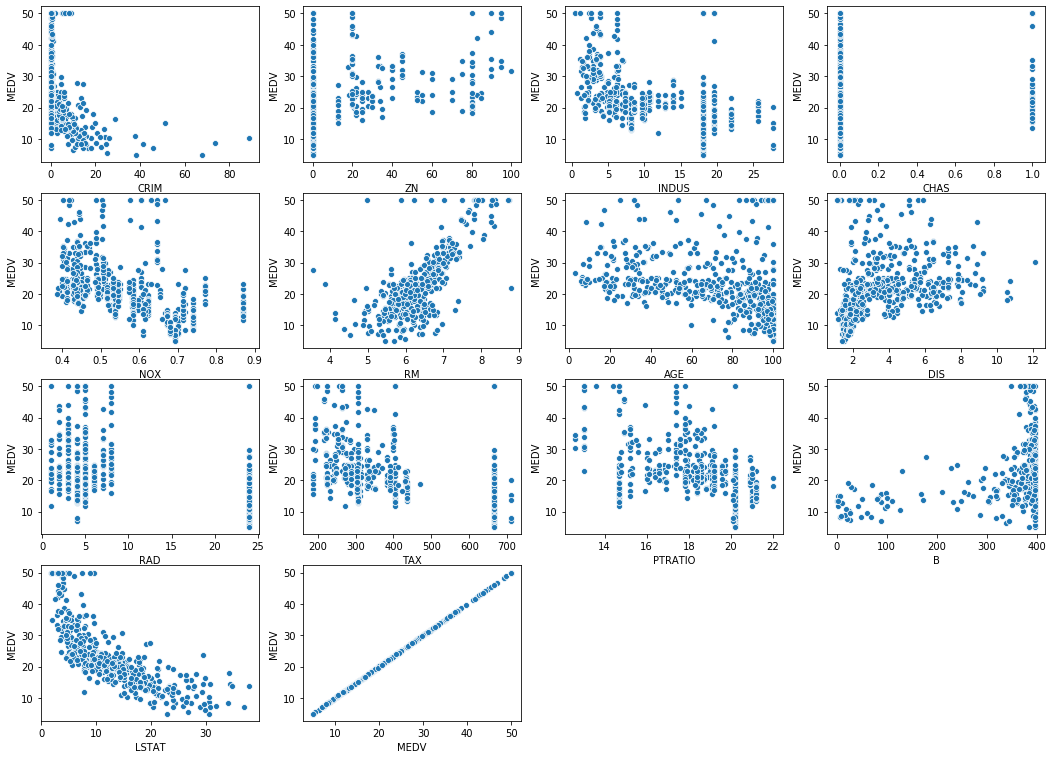

In [26]:
index=0
cols=[col for col in bostondf.select_dtypes(exclude=['object']).copy()]
fig = plt.figure(figsize=(18,20))
#fig = plt.figure(figsize=(18,16))
for col in cols:
    plt.subplot(6,4,index+1)
    index+=1
    sns.scatterplot(y='MEDV',x=col,data=bostondf)  

In [27]:
bostondf['CHAS'].unique()

array([0., 1.])

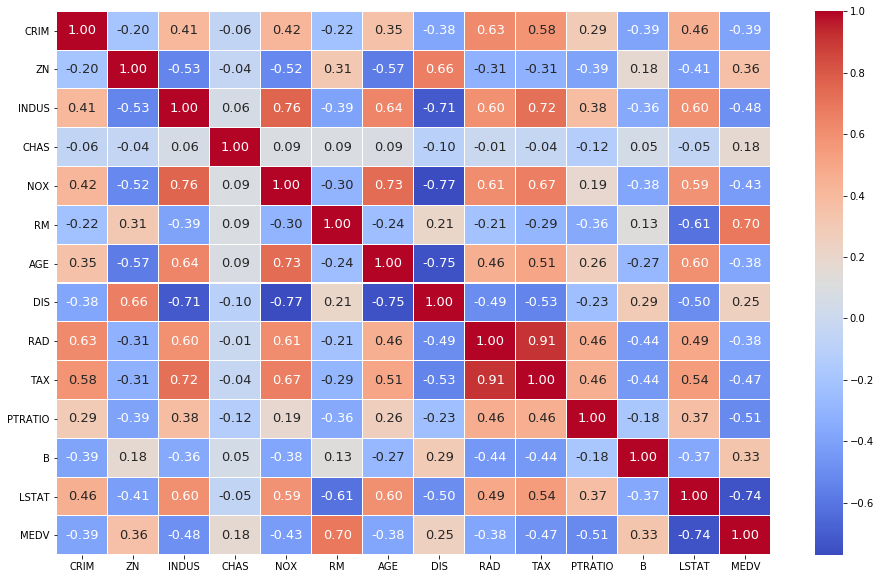

In [28]:
corrval=bostondf.corr()
fig,ax=plt.subplots(figsize=(16,10))
#plt.figure(figsize=(30,20))
sns.heatmap(corrval,cmap="coolwarm",ax=ax,fmt='.2f',annot=True,linewidths=.05,annot_kws={'size':13})

In [29]:
for col in cols:
    for j in cols:
        if j ==col:
            continue
        else:
            if abs(corrval[col][j]) > 0.8 :
                   print(f'{col}and {j} are highly correlated {corrval[col][j]}')



RADand TAX are highly correlated 0.9102281885331822
TAXand RAD are highly correlated 0.9102281885331822


In [30]:
## Since TAX and RAD are highly correlated, we can remove one of the features either TAX or RAD 
corrval

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [31]:
X=bostondf.drop(['MEDV','RAD'],axis=1)
Y=bostondf['MEDV']
print(X.shape,Y.shape)

(506, 12) (506,)


In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
y_train.shape

(354,)

In [33]:

linrregression = LinearRegression()
linrregression.fit(x_train,y_train)
y_pred=linrregression.predict(x_test)
print("The interecept is ",linrregression.intercept_)
linrregression.coef_

The interecept is  23.01581920903955


array([-0.82404407,  0.61106514, -0.06392888,  0.92524917, -1.55161796,
        3.06899161, -0.40677524, -2.87591624,  0.33725404, -1.85690371,
        0.95587678, -3.82749521])

In [34]:

print("The mean squared error is " ,mean_squared_error(y_pred,y_test))
print("The R2 score is " ,linrregression.score(x_test,y_test))

The mean squared error is  23.225651753463115
The R2 score is  0.6883010754490929


In [35]:
## Now,lets try with regularisation 

In [36]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [37]:
alpha=lasscv.alpha_
print("The alpha after cross validaiton is ",alpha)
lassregr=Lasso(alpha)
lassregr.fit(x_train,y_train) 
y_pred=lassregr.predict(x_test)


The alpha after cross validaiton is  0.0034718727313329833


In [38]:
print("The mean squared error for laso Regularisation " ,mean_squared_error(y_pred,y_test))
print("The R2 score for laso Regularisation " ,lassregr.score(x_test,y_test))

The mean squared error for laso Regularisation  23.220156256376757
The R2 score for laso Regularisation  0.6883748275465528


In [39]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([7.31815569, 7.94266936, 8.70287086, 1.58921479, 0.4822754 ,
       5.31817646, 1.41742714, 2.68447983, 1.72624222, 2.64083046,
       2.7411951 , 4.77043866, 8.65597741, 5.86296678, 3.1996668 ,
       9.57970818, 7.61036466, 3.70090661, 7.16440142, 7.46015508,
       0.8864358 , 6.09095947, 3.64857057, 2.71919005, 6.52147017,
       0.77728714, 0.08824069, 7.62656873, 3.37220106, 3.38223422,
       2.61494432, 3.00622542, 3.17636285, 7.77317754, 5.49203665,
       1.49473556, 9.15372687, 4.69605419, 7.8144926 , 6.97923644,
       0.64059707, 7.58224153, 5.90811699, 4.28751584, 6.64275671,
       5.85641605, 2.13162646, 3.056357  , 4.61659152, 5.47509687]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [40]:
alpha=ridgecv.alpha_
print("Alpha after Ridge CV is ",alpha)
ridge_regr=Ridge(alpha=alpha)
ridge_regr.fit(x_train,y_train)

Alpha after Ridge CV is  0.08824069161256776


Ridge(alpha=0.08824069161256776, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
y_pred_ridge=ridge_regr.predict(x_test)
print("The mean squared error for laso Regularisation " ,mean_squared_error(y_pred_ridge,y_test))
print("The R2 score for laso Regularisation " ,ridge_regr.score(x_test,y_test))

The mean squared error for laso Regularisation  23.225015599195395
The R2 score for laso Regularisation  0.6883096129318385


In [42]:
## Loading linear regression model to pickle file 

In [43]:
filename = 'finalized_regrmodel.pickle'
pickle.dump(linrregression, open(filename, 'wb'))